# Multivariate analysis
In this part we are going to analyze the data obtain and perform some multivariate analysis for instance PCA and clustering methods.
#### PCI analysis

#### Clustering K-means

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #for clusterization
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #to manage performance of our models

In [4]:
data_a = pd.read_csv('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/processed/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [12]:
data_a.shape

(5798, 882)

## PCA analysis

In [13]:
# distributing the dataset into two components X and Y
X = data_a.iloc[:, 0:881].values
y = data_a.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

In [43]:
principal_Df = pd.DataFrame(data = X_train
             , columns = ['principal component 1', 'principal component 2'])

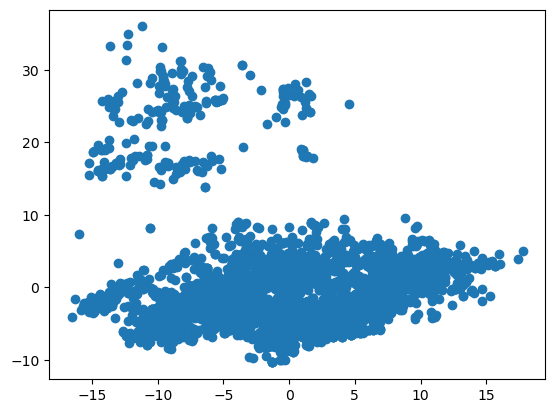

In [45]:
plt.figure()
plt.scatter(principal_Df['principal component 1'], principal_Df['principal component 2'])

<Figure size 640x480 with 0 Axes>

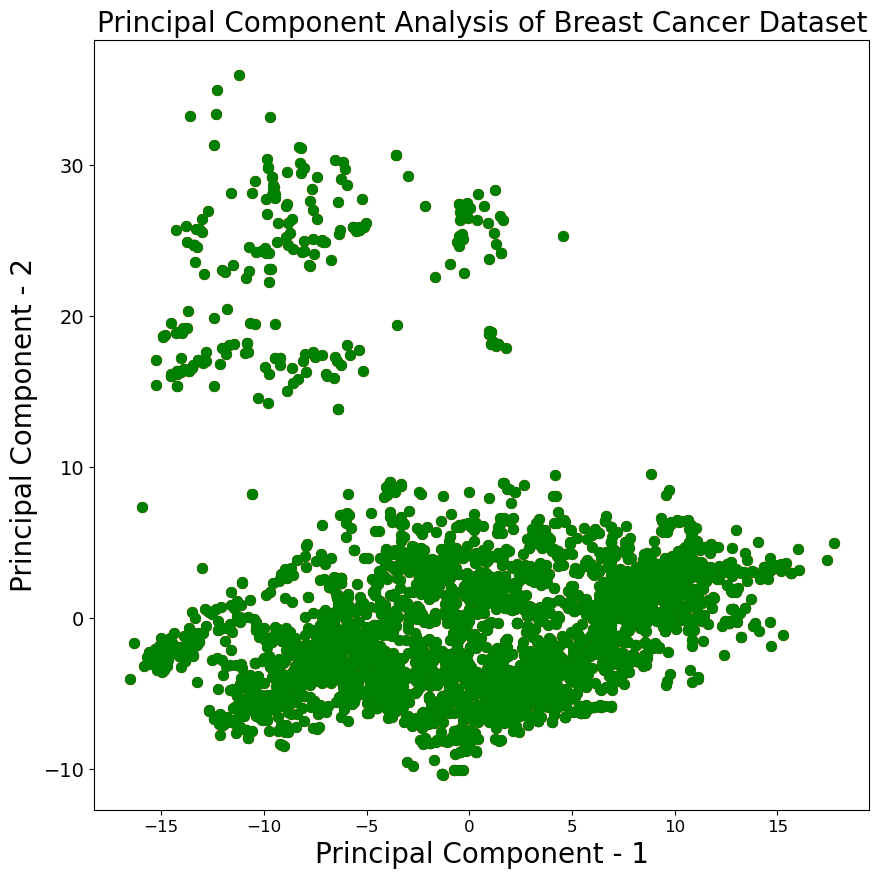

In [47]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)

colors = ['r', 'g']
for color in zip(colors):
    plt.scatter(principal_Df['principal component 1']
               , principal_Df['principal component 2'], c = color, s = 50)

#plt.legend(targets,prop={'size': 15})

In [19]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

# Clustering analysis

In [14]:
data=data_a.drop(['pIC50'], axis=1)

In [15]:
k2model = KMeans(n_clusters = 3, random_state=42) #save the model

k2model.fit(data) #adjust all the data points exect fot the species

print(f'Inertia = {k2model.inertia_}')

print(f'Centroids (x,y) = \n {k2model.cluster_centers_}')

Inertia = 242246.2380102765
Centroids (x,y) = 
 [[1.         0.99672775 0.89725131 ... 0.         0.         0.        ]
 [1.         0.99815242 0.93025404 ... 0.         0.         0.        ]
 [0.99952494 0.99002375 0.84513064 ... 0.         0.         0.        ]]


In [18]:
import matplotlib.pyplot as plt

KeyError: 'petal length (cm)'

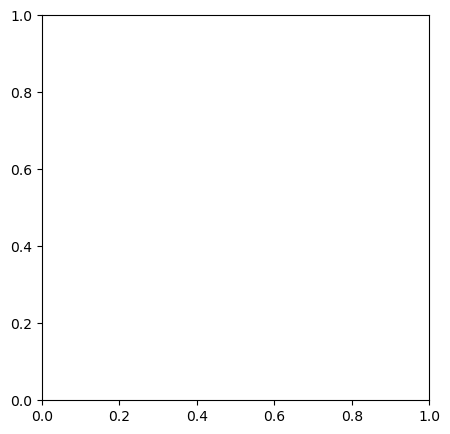

In [19]:
# graph
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

#setosa
ax.scatter(data[data.iloc[:,-1]==0]['petal length (cm)'],
            data[data.iloc[:,-1]==0][   'petal width (cm)'],
            c='k')

#versicolor
ax.scatter(data[data.iloc[:,-1]==1]['petal length (cm)'],
            data[data.iloc[:,-1]==1]['petal width (cm)'],
            c='r')

#virginica
ax.scatter(data[data.iloc[:,-1]==2]['petal length (cm)'],
            data[data.iloc[:,-1]==2]['petal width (cm)'],
            c='b')
ax.legend(['Setosa','Versicolor','Virginica'])

ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        'g*', markersize=30)            #plot the centroids

ax.set_title('K-Means clustering: Petal Length vs. Petal Width')
ax.set_xlabel('Petal length (cm)')
ax.set_ylabel('Petal width (cm)')
f.tight_layout()
